In [56]:
import sys

import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
import xclim as xc

sys.path.append('/g/data/wp00/shared_code/qqscale')
import utils

In [38]:
xvals = np.arange(0, 100, 0.1)

In [39]:
quantiles = np.arange(0.005, 1.0, 0.01)
quantiles

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

In [101]:
len(quantiles)

100

## Cannon example

See Section 4 of [Cannon et al (2015)](https://journals.ametsoc.org/view/journals/clim/28/17/jcli-d-14-00754.1.xml#bib44).

In [41]:
def plot_distribution(ax, xvals, obs_pdf, hist_pdf, future_pdf):
    """Plot rainfall distribution"""

    ax.plot(xvals, obs_pdf, color='tab:red', label='obs')
    ax.plot(xvals, hist_pdf, color='black', label='hist')
    ax.plot(xvals, future_pdf, color='tab:blue', label='future')
    ax.set_xlabel('precipitation (mm/day)')
    ax.set_ylabel('density')
    ax.legend()
    ax.set_xlim(0, 100)
    ax.set_title('Rainfall distribution')
    ax.grid()

    
def plot_quantiles(ax, quantiles, obs_quantiles, hist_quantiles, future_quantiles):
    """Plot quantiles"""

    ax.plot(quantiles, obs_quantiles, marker='o', color='tab:red', label='obs')
    ax.plot(quantiles, hist_quantiles, marker='o', color='black', label='hist')
    ax.plot(quantiles, future_quantiles, marker='o', color='tab:blue', label='future')
    ax.legend()
    ax.set_ylabel('rainfall (mm)')
    ax.set_xlabel('quantile')
    ax.set_title('Rainfall quantiles')
    ax.grid()

    
def plot_adjustments(ax, quantiles, adjustment_factors, mean_scaling):
    """Plot adjustment factors"""

    ax.plot(quantiles, adjustment_factors, marker='o')
    ax.axhline(mean_scaling)
    ax.set_ylabel('adjustment factor')
    ax.set_xlabel('quantile')
    ax.set_title('Adjustment factors')
    ax.grid()
    
    
def gamma_analysis(future_shape, future_scale):
    """Run the Cannon example"""

    obs_shape = 4.0
    obs_scale = 7.5
    hist_shape = 8.15
    hist_scale = 3.68
    
    obs_std = gamma.std(a=obs_shape, scale=obs_scale)
    hist_std = gamma.std(a=hist_shape, scale=hist_scale)
    future_std = gamma.std(a=future_shape, scale=future_scale)

    print(f'Obs std: {obs_std:.1f}')
    print(f'Hist std: {hist_std:.1f}')
    print(f'Future std: {future_std:.1f}')
    
    obs_mean = gamma.mean(a=obs_shape, scale=obs_scale)
    hist_mean = gamma.mean(a=hist_shape, scale=hist_scale)
    future_mean = gamma.mean(a=future_shape, scale=future_scale)

    print(f'Obs mean: {obs_mean:.1f}')
    print(f'Hist mean: {hist_mean:.1f}')
    print(f'Future mean: {future_mean:.1f}')
    
    fig = plt.figure(figsize=[8, 16])
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    obs_pdf = gamma.pdf(xvals, a=obs_shape, scale=obs_scale)
    hist_pdf = gamma.pdf(xvals, a=hist_shape, scale=hist_scale)
    future_pdf = gamma.pdf(xvals, a=future_shape, scale=future_scale)
    plot_distribution(ax1, xvals, obs_pdf, hist_pdf, future_pdf)
    
    obs_quantiles = gamma.ppf(quantiles, a=obs_shape, scale=obs_scale)
    hist_quantiles = gamma.ppf(quantiles, a=hist_shape, scale=hist_scale)
    future_quantiles = gamma.ppf(quantiles, a=future_shape, scale=future_scale)
    plot_quantiles(ax2, quantiles, obs_quantiles, hist_quantiles, future_quantiles)
    
    hist_mean = gamma.mean(a=hist_shape, scale=hist_scale)
    future_mean = gamma.mean(a=future_shape, scale=future_scale)
    mean_scaling = future_mean / hist_mean
    adjustment_factors = future_quantiles / hist_quantiles
    plot_adjustments(ax3, quantiles, adjustment_factors, mean_scaling)

    hist_adjusted = adjustment_factors * hist_quantiles
    model_change = ((hist_adjusted.sum() - hist_quantiles.sum()) / hist_quantiles.sum()) * 100
    obs_adjusted = adjustment_factors * obs_quantiles
    qq_change = ((obs_adjusted.sum() - obs_quantiles.sum()) / obs_quantiles.sum()) * 100
    print(f'Model change in rainfall: {model_change:.1f}%')
    print(f'QQ change in rainfall: {qq_change:.1f}%')
    
    plt.show()

### Example 1 (from paper)
Model underestimates variance, projected change is for a wetter future.

Obs std: 15.0
Hist std: 10.5
Future std: 10.5
Obs mean: 30.0
Hist mean: 30.0
Future mean: 42.1
Model change in rainfall: 40.3%
QQ change in rainfall: 38.3%


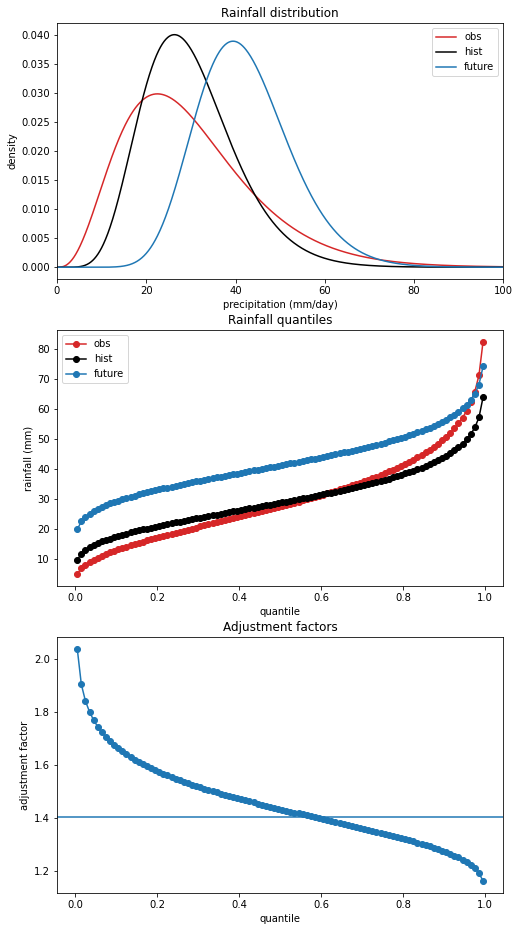

In [29]:
gamma_analysis(16, 2.63)

### Example 2

Model underestimates variance, projected change is for a drier future.

Obs std: 15.0
Hist std: 10.5
Future std: 11.0
Obs mean: 30.0
Hist mean: 30.0
Future mean: 24.0
Model change in rainfall: -20.0%
QQ change in rainfall: -18.8%


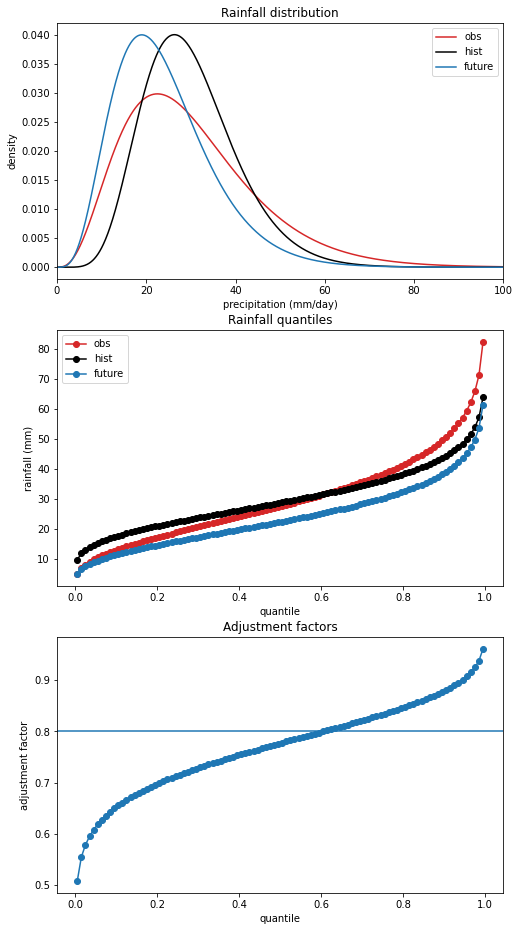

In [30]:
gamma_analysis(4.8, 5)

### Summary

So the multiplicative adjustments are larger in magnitude at lower quantiles because the relative difference between the historical and future values is greater at lower rainfall amounts.

If the model underestimates the observed variance, a relatively lower proportion of the observed rainfall is at lower amounts (to recieve the bigger adjustment) so the magnitude of the qq-scaled change is smaller than the magnitude of the GCM change.

## Real data

In [31]:
hist_file = "/g/data/wp00/data/QQ-CMIP6/ACCESS-ESM1-5/historical/r1i1p1f1/day/pr/v20191115/pr-ssr_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_19950101-20141231.nc"
future_file = "/g/data/wp00/data/QQ-CMIP6/ACCESS-ESM1-5/ssp370/r1i1p1f1/day/pr/v20191115/pr-ssr_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_20560101-20851231.nc"
obs_file = "/g/data/wp00/data/AGCD/precip-ssr_AGCD_r005_19900101-20191231_daily.nc"
hist_time_bounds = ["1995-01-01", "2014-12-31"]
future_time_bounds = ["2065-01-01", "2084-12-31"]
obs_time_bounds = ["1995-01-01", "2014-12-31"]

In [32]:
hist_units = "mm day-1"
future_units = "mm day-1"
obs_units = "mm day-1"
output_units = "mm day-1"
hist_var = "pr"
future_var = "pr"
obs_var = "precip"

In [50]:
ds_hist = utils.read_data(
    hist_file,
    hist_var,
    time_bounds=hist_time_bounds,
    input_units=hist_units,
    output_units=output_units,
)
da_hist = ds_hist[hist_var]

In [51]:
ds_future = utils.read_data(
    future_file,
    future_var,
    time_bounds=future_time_bounds,
    input_units=future_units,
    output_units=output_units,
)
da_future = ds_future[future_var]

In [52]:
ds_obs = utils.read_data(
    obs_file,
    obs_var,
    time_bounds=obs_time_bounds,
    input_units=obs_units,
    output_units=output_units
)
da_obs = ds_obs[obs_var]

In [94]:
def rptot(da, pct):
    """Calculate rXXpTOT for a given percentile"""
    
    pct_value = utils.get_quantiles(da, [pct], timescale='annual').values
    upper = float(da.where(da > pct_value).sum().values)
    lower = float(da.where(da <= pct_value).sum().values)
    total = float(da.sum().values)
    result = (upper / total) * 100
    
    return result

In [143]:
def get_pct_in_each_bin(da):
    """Get the perentage of total rainfall in each bin"""

    pct_above_each_bin = []
    for pct in np.arange(0, 1, 0.01):
        value = rptot(da, pct)
        pct_above_each_bin.append(value)
    pct_above_each_bin = np.array(pct_above_each_bin)
    pct_in_each_bin = pct_above_each_bin[0:-1] - pct_above_each_bin[1:]
    pct_in_each_bin = np.append(pct_in_each_bin, pct_above_each_bin[-1])
    
    return pct_in_each_bin

In [156]:
def real_analysis(city, lat, lon):
    """Process real data"""

    point_selection = {'lat': lat, 'lon': lon}
    
    da_hist_point = da_hist.sel(point_selection, method='nearest')
    da_hist_point = da_hist_point.compute()
    hist_quantiles = utils.get_quantiles(da_hist_point, quantiles, timescale='annual')
    
    da_future_point = da_future.sel(point_selection, method='nearest')
    da_future_point = da_future_point.compute()
    future_quantiles = utils.get_quantiles(da_future_point, quantiles, timescale='annual')
    
    da_obs_point = da_obs.sel(point_selection, method='nearest')
    da_obs_point = da_obs_point.compute()
    obs_quantiles = utils.get_quantiles(da_obs_point, quantiles, timescale='annual')
    
    fig = plt.figure(figsize=[8, 16])
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    plot_quantiles(ax1, quantiles, obs_quantiles, hist_quantiles, future_quantiles)

    hist_mean = da_hist_point.data.mean()
    future_mean = da_future_point.data.mean()
    mean_scaling = future_mean / hist_mean
    adjustment_factors = future_quantiles / hist_quantiles
    plot_adjustments(ax2, quantiles, adjustment_factors, mean_scaling)

    obs_pct_in_each_bin = get_pct_in_each_bin(da_obs_point)
    hist_pct_in_each_bin = get_pct_in_each_bin(da_hist_point)
    obs_change_in_each_bin = (obs_pct_in_each_bin * adjustment_factors.values) - obs_pct_in_each_bin
    hist_change_in_each_bin = (hist_pct_in_each_bin * adjustment_factors.values) - hist_pct_in_each_bin
    ax3.bar(np.arange(0, 100, 1), obs_change_in_each_bin, label='obs', alpha=0.5)
    ax3.bar(np.arange(0, 100, 1), hist_change_in_each_bin, label='hist', alpha=0.5)
    ax3.legend()
    ax3.set_xlim(60, 100)
    
    obs_r99ptot = rptot(da_obs_point, 0.99)
    obs_r95ptot = rptot(da_obs_point, 0.95)
    obs_r75ptot = rptot(da_obs_point, 0.75)
    print(f'Obs R99pTOT: {obs_r99ptot:.1f}%')
    print(f'Obs R95pTOT: {obs_r95ptot:.1f}%')
    print(f'Obs R75pTOT: {obs_r75ptot:.1f}%')
    
    hist_r99ptot = rptot(da_hist_point, 0.99)
    hist_r95ptot = rptot(da_hist_point, 0.95)
    hist_r75ptot = rptot(da_hist_point, 0.75)
    print(f'Hist R99pTOT: {hist_r99ptot:.1f}%')
    print(f'Hist R95pTOT: {hist_r95ptot:.1f}%')
    print(f'Hist R75pTOT: {hist_r75ptot:.1f}%')
    
    model_change = ((future_mean - hist_mean) / hist_mean) * 100
    obs_adjusted = adjustment_factors * obs_quantiles
    qq_change = ((obs_adjusted.data.mean() - obs_quantiles.data.mean()) / obs_quantiles.data.mean()) * 100    
    print(f'Model change in rainfall: {model_change:.1f}%')
    print(f'QQ change in rainfall: {qq_change:.1f}%')

    plt.suptitle(city)
    plt.show()

In [157]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Geraldton': (-28.8, 114.6),
    'Perth': (-32.0, 115.9),
    'Adelaide': (-34.9, 138.6),
}

Obs R99pTOT: 26.2%
Obs R95pTOT: 62.7%
Obs R75pTOT: 97.7%
Hist R99pTOT: 18.3%
Hist R95pTOT: 48.2%
Hist R75pTOT: 85.7%
Model change in rainfall: -9.1%
QQ change in rainfall: -10.5%


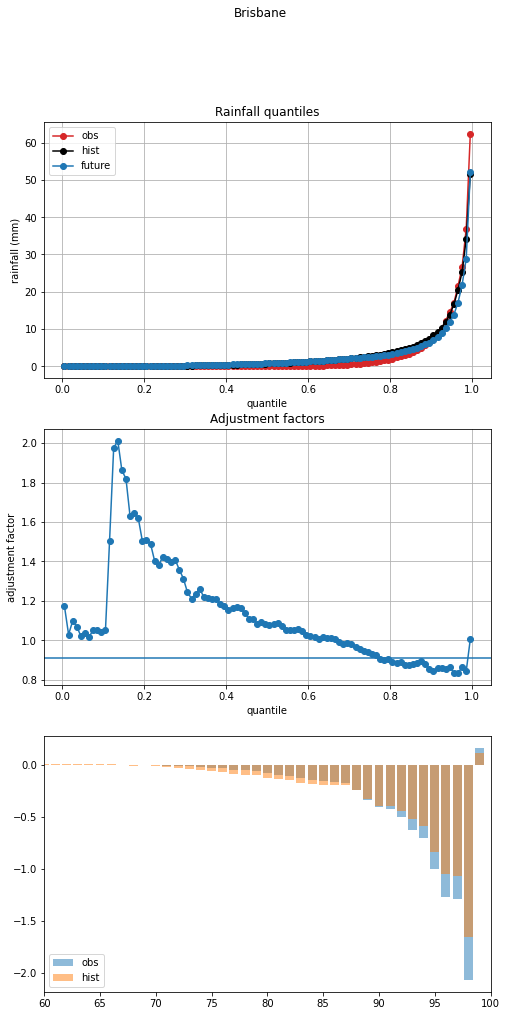

In [158]:
#for city, coords in city_lat_lon.items():
#    lat, lon = coords
#    print(city)
#    real_analysis(city, lat, lon)

lat, lon = city_lat_lon['Brisbane']
real_analysis('Brisbane', lat, lon)

TODO: Brisbane doesn't get drier in the actual qq-scaled data, so need to do this analysis on a month-by-month basis.